# Truck Price vs. Mileage Regressions

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Import Data Into Pandas DataFrame

file = 'SMU_DATA\csv\Pickup_Data_Clean.csv'
df_all = pd.read_csv(file)
df_all.head(50)

,brandName,modelName,vf_ModelID,vf_ModelYear,mileage,askPrice,msrp,color,vf_EngineCylinders,vf_FuelTypePrimary,vin
0,FORD,F-250,1805.0,2017.0,19106,40962,40962,Ingot Silver Metallic,8.0,Diesel,bcd4bbecbba3b9ed2330d543abc3d90b997aa8fa6e628d...
1,FORD,F-150,1801.0,2017.0,28194,28962,28962,Ingot Silver Metallic,6.0,Gasoline,a8f09496d9523e33ee3a8f885a475f5ef001d68a334c98...
2,GMC,Sierra,1857.0,2017.0,7483,43962,43962,Crimson Red Tintcoat,8.0,Gasoline,c65dd3e96f4f68a0d4c7b09005273e0312295057c7c529...
3,FORD,F-250,1805.0,2017.0,23881,38962,38962,Oxford White,8.0,Diesel,966168515802a7cf510d6c87a15cf71cc4385316a504c6...
4,GMC,Canyon,4093.0,2017.0,6333,30962,30962,Onyx Black,6.0,Gasoline,9c7648c843035d0b46e9d716d947dfa3d0e8881054247a...
5,FORD,F-150,1801.0,2016.0,26519,33962,33962,Oxford White,8.0,Gasoline,a7744ea6d085d017db4eb549ed430a4d4b8074c9cb1112...
6,FORD,F-150,1801.0,2017.0,21638,30962,30962,Shadow Black,8.0,Gasoline,258da8b91266c89798249877ed79bec864e49648eabd80...
7,FORD,F-150,1801.0,2016.0,23695,41962,41962,Blue Flame Metallic,6.0,Gasoline,cd4ba8b2c47e66a96b02a95521c480f918e7bd3a22944e...
8,FORD,F-150,1801.0,2016.0,32084,28962,28962,Oxford White,8.0,Gasoline,34ad4bc5a8e0496ae7ed3315c2abda14eb2901f40615b1...
9,RAM,2500,13621.0,2017.0,12084,41962,41962,Bright White Clearcoat,6.0,Diesel,574ea1a1220ac84424596c4dae9737621a3246320f6c33...


### Rename Columns & Change Data Types

In [3]:
df_all = df_all.rename(columns={'brandName':'Manufacturer',
                                 'modelName':'Model',
                                 'vf_ModelYear':'Year',
                                 'vf_ModelID':'Model ID',
                                 'mileage':'Mileage',
                                 'askPrice':'Price',
                                 'msrp':'MSRP',
                                 'color':'Color',
                                 'vf_EngineCylinders':'Engine Cylinders',
                                 'vf_FuelTypePrimary':'Fuel Type',
                                 'vin':'VIN'})

df_all.head(1)

,Manufacturer,Model,Model ID,Year,Mileage,Price,MSRP,Color,Engine Cylinders,Fuel Type,VIN
0,FORD,F-250,1805.0,2017.0,19106,40962,40962,Ingot Silver Metallic,8.0,Diesel,bcd4bbecbba3b9ed2330d543abc3d90b997aa8fa6e628d...


In [4]:
df_all.dtypes

Manufacturer         object
Model                object
Model ID            float64
Year                float64
Mileage               int64
Price                 int64
MSRP                  int64
Color                object
Engine Cylinders    float64
Fuel Type            object
VIN                  object
dtype: object

In [5]:
convert_dict = {'Manufacturer': str,
                'Model': str,
                'Year': int, 
                'Model ID': int, 
                'Mileage': int, 
                'Price': int, 
                'MSRP': int, 
                'Color': str, 
                'Engine Cylinders': int, 
                'Fuel Type': str, 
                'VIN': str, 
               
               }

df_all = df_all.astype(convert_dict)
df_all.dtypes

Manufacturer        object
Model               object
Model ID             int32
Year                 int32
Mileage              int32
Price                int32
MSRP                 int32
Color               object
Engine Cylinders     int32
Fuel Type           object
VIN                 object
dtype: object

In [6]:
df_all.head(2)

,Manufacturer,Model,Model ID,Year,Mileage,Price,MSRP,Color,Engine Cylinders,Fuel Type,VIN
0,FORD,F-250,1805,2017,19106,40962,40962,Ingot Silver Metallic,8,Diesel,bcd4bbecbba3b9ed2330d543abc3d90b997aa8fa6e628d...
1,FORD,F-150,1801,2017,28194,28962,28962,Ingot Silver Metallic,6,Gasoline,a8f09496d9523e33ee3a8f885a475f5ef001d68a334c98...


In [7]:
print('Number of Records: '+str(len(df_all['VIN'])))

Number of Records: 50788


In [8]:
print(df_all['Year'].unique())

[2017 2016 2008 2014 2013 2015 2012 2018 2010 2009 2003 2004 2011 2007
 2001 2006 2019 1994 2002 2005 2000 2020 1995 1998 1999 1997 1991 1996
 1990 1992 1988 1993 1987]


### Remove Trucks Older Than 5 Years

In [46]:
df_all1 = df_all.loc[(df_all['Year']>=2015)]
                   
df_all1.head()

,Manufacturer,Model,Model ID,Year,Mileage,Price,MSRP,Color,Engine Cylinders,Fuel Type,VIN
0,FORD,F-250,1805,2017,19106,40962,40962,Ingot Silver Metallic,8,Diesel,bcd4bbecbba3b9ed2330d543abc3d90b997aa8fa6e628d...
1,FORD,F-150,1801,2017,28194,28962,28962,Ingot Silver Metallic,6,Gasoline,a8f09496d9523e33ee3a8f885a475f5ef001d68a334c98...
2,GMC,Sierra,1857,2017,7483,43962,43962,Crimson Red Tintcoat,8,Gasoline,c65dd3e96f4f68a0d4c7b09005273e0312295057c7c529...
3,FORD,F-250,1805,2017,23881,38962,38962,Oxford White,8,Diesel,966168515802a7cf510d6c87a15cf71cc4385316a504c6...
4,GMC,Canyon,4093,2017,6333,30962,30962,Onyx Black,6,Gasoline,9c7648c843035d0b46e9d716d947dfa3d0e8881054247a...


In [47]:
print('Number of Records: '+str(len(df_all1['VIN'])))

Number of Records: 30368


### Remove Trucks With More Than 110,000 Miles

In [48]:
df_all2 = df_all1.loc[(df_all['Mileage']<=150000)]
                   
df_all2.head()

,Manufacturer,Model,Model ID,Year,Mileage,Price,MSRP,Color,Engine Cylinders,Fuel Type,VIN
0,FORD,F-250,1805,2017,19106,40962,40962,Ingot Silver Metallic,8,Diesel,bcd4bbecbba3b9ed2330d543abc3d90b997aa8fa6e628d...
1,FORD,F-150,1801,2017,28194,28962,28962,Ingot Silver Metallic,6,Gasoline,a8f09496d9523e33ee3a8f885a475f5ef001d68a334c98...
2,GMC,Sierra,1857,2017,7483,43962,43962,Crimson Red Tintcoat,8,Gasoline,c65dd3e96f4f68a0d4c7b09005273e0312295057c7c529...
3,FORD,F-250,1805,2017,23881,38962,38962,Oxford White,8,Diesel,966168515802a7cf510d6c87a15cf71cc4385316a504c6...
4,GMC,Canyon,4093,2017,6333,30962,30962,Onyx Black,6,Gasoline,9c7648c843035d0b46e9d716d947dfa3d0e8881054247a...


In [49]:
print('Number of Records: '+str(len(df_all2['Mileage'])))

Number of Records: 30289


## Def Function for Regression

In [265]:
miles_dict = []

for mile in range(150000):
    miles_dict.append(mile)

truck_reg_dict = {'Miles':miles_dict}

truck_reg_df = pd.DataFrame(truck_reg_dict)

         Miles
0            0
1            1
2            2
3            3
4            4
...        ...
149995  149995
149996  149996
149997  149997
149998  149998
149999  149999

[150000 rows x 1 columns]


In [402]:
def LinReg(dframe):
    # Linear Regression Using SKLearn

    #1. Determine X & y

    x = dframe['Mileage'].values
    y = dframe['Price'].values

    #2. Split the Dataset in Training Set and Test Set

    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

    # Visualize Data Split

    plt.scatter(x_train,y_train, label='Training Data', color='y',alpha=.7)
    #plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
    #plt.legend()

    #3. Train the Model on the Training Set

    LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

    # Use Model to Predict on Test Data

    pred = LR.predict(x_test.reshape(-1,1))

    # Set X & Y Limits

    ax = plt.gca()
    ax.set_xlim([1000,150000])
    ax.set_ylim([1000,60000])

    # Plot Prediction Line Against Actual Test Data


    plt.plot(x_test, pred, label = 'Linear Regression',color='c')
    plt.scatter(x_test,y_test,label = 'Actual Test Data',color='g',alpha=.7,edgecolors='k')
    plt.legend()
    plt.title('Price vs Mileage of '+dframe.iloc[1,0]+' '+dframe.iloc[1,1])
    plt.xlabel('Mileage')
    plt.ylabel('Price ($)')
    plt.grid(True)
    plt.show()



    # Evaluate the Model
    scr = LR.score(x_train.reshape(-1,1),y_train)
    scr = '{:,.2f}%'.format(scr*100)
    print('The Overall Accuracry of the Model is: '+scr)

    r2 = r2_score(y_test,pred)
    print('The R^2 Value of the Linear Regression Model is: '+str(r2))


    m = float(LR.coef_)
    m = '{:,.2f}'.format(m)
    b= float(LR.intercept_)
    b=  '{:,.2f}'.format(b)

    print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))
    print('For Every Mile Driven The Value of the Truck Drops by: $'+str(m))
    print('Number of Records: '+str(len(dframe['VIN'])))
    

    
    


In [403]:
def polyReg(dframe):
    
    # PolyNomial Regression Using SKLearn

    #1. Determine X & y

    x = dframe['Mileage'].values
    y = dframe['Price'].values
    
    x = x.reshape(-1,1)

    #2. Split the Dataset in Training Set and Test Set

    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

    # Visualize Data Split

    plt.scatter(x_train,y_train, label='Training Data', color='y',alpha=.7)
    #plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
    #plt.legend()
    
    # Polynomial Regression Fit
    
    poly  = PolynomialFeatures(degree = 2)
    #x_polynom = poly.fit_transform(x_train)
    x_train_poly , x_test_poly = poly.fit_transform(x), poly.fit_transform(y)
    
    PolReg = LinearRegression().fit(x_train.reshape(-1,1),y_train)
    PolReg.fit(x_polynom, y_train)
    
    # Set X & Y Limits

    ax = plt.gca()
    ax.set_xlim([0,150000])
    ax.set_ylim([0,60000])
    
    # Plot the Scatter & Regression
    
    plt.scatter(x_train, y_train, color='g')
    plt.plot(X_train, PolReg.predict(polynom.fit_transform(X_train)),color='b')
    
    plt.legend()
    plt.title('Price vs Mileage of '+dframe.iloc[1,0]+' '+dframe.iloc[1,1])
    plt.xlabel('Mileage')
    plt.ylabel('Price ($)')
    plt.grid(True)
    plt.show()
    
    
    

In [404]:
# Box Plot Def

def BoxPlot(dframe):
    mileage = dframe['Price']

    fig1, ax1 = plt.subplots()
    ax1.set_title('Test1')
    ax1.set_ylabel('Mileage')
    ax1.boxplot(mileage)
    plt.show()

## Truck Brands

In [405]:
models = df_all1['Manufacturer'].unique()
print(models)

['FORD' 'GMC' 'RAM' 'CHEVROLET' 'TOYOTA' 'NISSAN' 'HONDA' 'JEEP']


## Ford Trucks

In [406]:
ford_df = df_all2.loc[(df_all2['Manufacturer']=='FORD')]

In [407]:
models = ford_df['Model'].unique()
print(models)
print("")
print('Number of Records: '+str(len(ford_df['VIN'])))

['F-250' 'F-150' 'F-350' 'F-450']

Number of Records: 11067


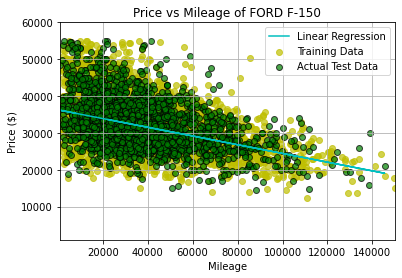

The Overall Accuracry of the Model is: 17.71%
The R^2 Value of the Linear Regression Model is: 0.15588960825002385
The Linear Equation of the Regression is: Y=-0.12X + 36,267.72
For Every Mile Driven The Value of the Truck Drops by: $-0.12
Number of Records: 9197


In [408]:
ford_f150_df = ford_df.loc[(ford_df['Model']=='F-150')]
LinReg(ford_f150_df)


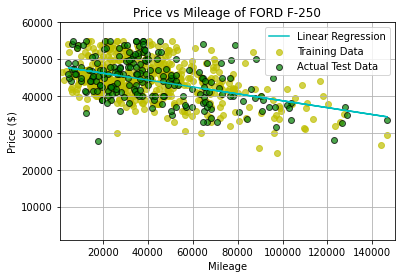

The Overall Accuracry of the Model is: 19.82%
The R^2 Value of the Linear Regression Model is: 0.23007534933926088
The Linear Equation of the Regression is: Y=-0.09X + 48,097.43
For Every Mile Driven The Value of the Truck Drops by: $-0.09
Number of Records: 699


In [409]:
ford_f250_df = ford_df.loc[(ford_df['Model']=='F-250')&(ford_df['Fuel Type']=='Diesel')]
LinReg(ford_f250_df)


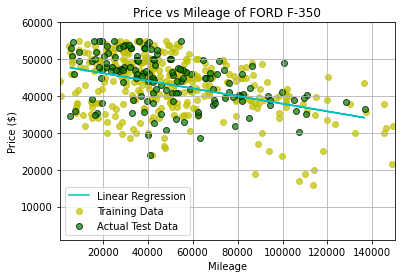

The Overall Accuracry of the Model is: 17.79%
The R^2 Value of the Linear Regression Model is: 0.15070341603576776
The Linear Equation of the Regression is: Y=-0.10X + 48,289.00
For Every Mile Driven The Value of the Truck Drops by: $-0.10
Number of Records: 482


In [410]:
ford_f350_df = ford_df.loc[(ford_df['Model']=='F-350')]
LinReg(ford_f350_df)

In [411]:
ford_ranger_df = ford_df.loc[(ford_df['Model']=='Ranger')]
try:
    LinReg(ford_ranger_df)
except:
    print('Number of Records: '+str(len(ford_ranger_df['VIN'])))

Number of Records: 0


## Toyota Trucks

In [412]:
toyota_df = df_all2.loc[(df_all2['Manufacturer']=='TOYOTA')]
models = toyota_df['Model'].unique()
print(models)
print("")
print('Number of Records: '+str(len(toyota_df['VIN'])))

['Tacoma' 'Tundra']

Number of Records: 1969


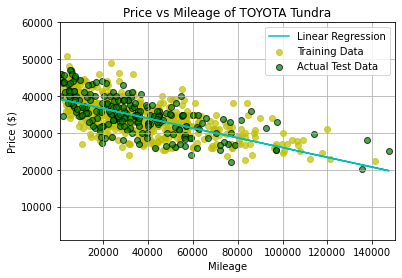

The Overall Accuracry of the Model is: 42.48%
The R^2 Value of the Linear Regression Model is: 0.44264975534088935
The Linear Equation of the Regression is: Y=-0.13X + 39,270.17
For Every Mile Driven The Value of the Truck Drops by: $-0.13
Number of Records: 718


In [413]:
toyota_tundra_df = toyota_df.loc[(toyota_df['Model']=='Tundra')]
LinReg(toyota_tundra_df)

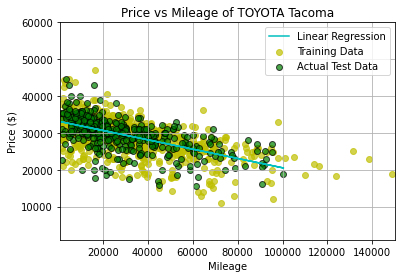

The Overall Accuracry of the Model is: 36.13%
The R^2 Value of the Linear Regression Model is: 0.3457739500863438
The Linear Equation of the Regression is: Y=-0.13X + 33,203.86
For Every Mile Driven The Value of the Truck Drops by: $-0.13
Number of Records: 1251


In [414]:
toyota_tacoma_df = toyota_df.loc[(toyota_df['Model']=='Tacoma')]
LinReg(toyota_tacoma_df)

## GMC Trucks

In [415]:
gmc_df = df_all2.loc[(df_all2['Manufacturer']=='GMC')]
models = gmc_df['Model'].unique()
print(models)
print("")
print('Number of Records: '+str(len(gmc_df['VIN'])))

['Sierra' 'Canyon' 'Sierra HD' 'Sierra Limited']

Number of Records: 3102


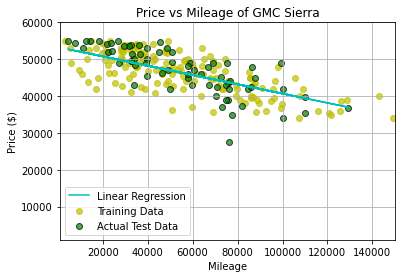

The Overall Accuracry of the Model is: 50.24%
The R^2 Value of the Linear Regression Model is: 0.5477445358596613
The Linear Equation of the Regression is: Y=-0.13X + 53,292.70
For Every Mile Driven The Value of the Truck Drops by: $-0.13
Number of Records: 225


In [416]:
gmc_sierra_df1 = gmc_df.loc[(gmc_df['Model']=='Sierra')&(gmc_df['Fuel Type']=='Diesel')]
LinReg(gmc_sierra_df1)

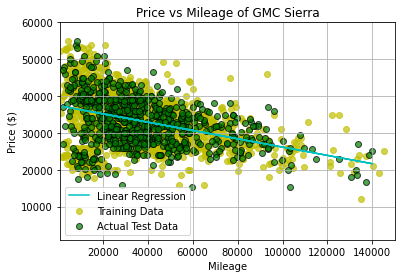

The Overall Accuracry of the Model is: 14.99%
The R^2 Value of the Linear Regression Model is: 0.15602227676940383
The Linear Equation of the Regression is: Y=-0.11X + 37,442.27
For Every Mile Driven The Value of the Truck Drops by: $-0.11
Number of Records: 2427


In [417]:
gmc_sierra_df2 = gmc_df.loc[(gmc_df['Model']=='Sierra')&(gmc_df['Fuel Type']=='Gasoline')]
LinReg(gmc_sierra_df2)

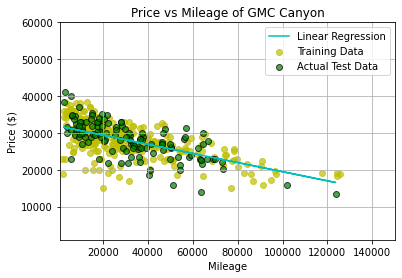

The Overall Accuracry of the Model is: 39.12%
The R^2 Value of the Linear Regression Model is: 0.47645067224759263
The Linear Equation of the Regression is: Y=-0.12X + 31,886.33
For Every Mile Driven The Value of the Truck Drops by: $-0.12
Number of Records: 429


In [418]:
gmc_canyon_df = gmc_df.loc[(gmc_df['Model']=='Canyon')]
LinReg(gmc_canyon_df)

## Ram Trucks

In [419]:
ram_df = df_all2.loc[(df_all2['Manufacturer']=='RAM')]
models = ram_df['Model'].unique()
print(models)
print("")
print('Number of Records: '+str(len(ram_df['VIN'])))

['2500' '1500' '3500']

Number of Records: 7188


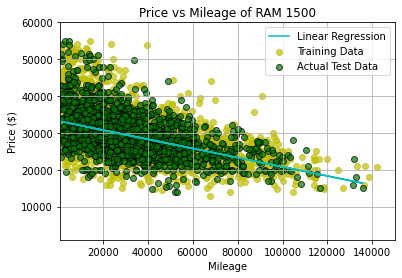

The Overall Accuracry of the Model is: 21.70%
The R^2 Value of the Linear Regression Model is: 0.2431693117546193
The Linear Equation of the Regression is: Y=-0.12X + 33,270.29
For Every Mile Driven The Value of the Truck Drops by: $-0.12
Number of Records: 6043


In [420]:
ram_1500_df = ram_df.loc[(ram_df['Model']=='1500')]
LinReg(ram_1500_df)

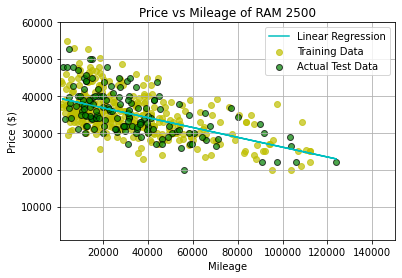

The Overall Accuracry of the Model is: 32.20%
The R^2 Value of the Linear Regression Model is: 0.35959386682721683
The Linear Equation of the Regression is: Y=-0.13X + 39,490.06
For Every Mile Driven The Value of the Truck Drops by: $-0.13
Number of Records: 485


In [421]:
ram_2500_df1 = ram_df.loc[(ram_df['Model']=='2500')&(ram_df['Fuel Type']=='Gasoline')]
LinReg(ram_2500_df1)

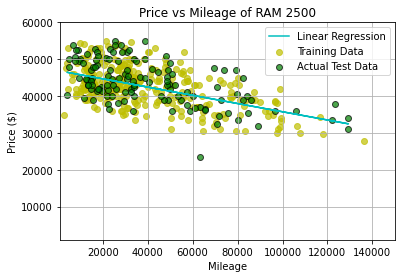

The Overall Accuracry of the Model is: 27.99%
The R^2 Value of the Linear Regression Model is: 0.3016192342466538
The Linear Equation of the Regression is: Y=-0.11X + 46,908.27
For Every Mile Driven The Value of the Truck Drops by: $-0.11
Number of Records: 431


In [422]:
ram_2500_df2 = ram_df.loc[(ram_df['Model']=='2500')&(ram_df['Fuel Type']=='Diesel')]
LinReg(ram_2500_df2)

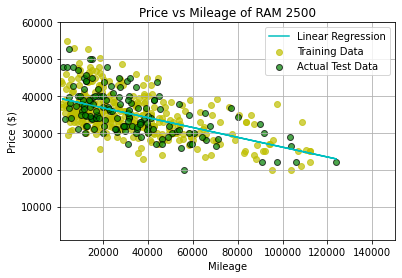

The Overall Accuracry of the Model is: 32.20%
The R^2 Value of the Linear Regression Model is: 0.35959386682721683
The Linear Equation of the Regression is: Y=-0.13X + 39,490.06
For Every Mile Driven The Value of the Truck Drops by: $-0.13
Number of Records: 485


In [423]:
ram_2500_df = ram_df.loc[(ram_df['Model']=='2500')&(ram_df['Fuel Type']=='Gasoline')]
LinReg(ram_2500_df)

## Chevorlet Trucks

In [424]:
chevy_df = df_all2.loc[(df_all2['Manufacturer']=='CHEVROLET')]
models = chevy_df['Model'].unique()
print(models)
print("")
print('Number of Records: '+str(len(chevy_df['VIN'])))

['Colorado' 'Silverado' 'Silverado HD' 'Silverado LD']

Number of Records: 6619


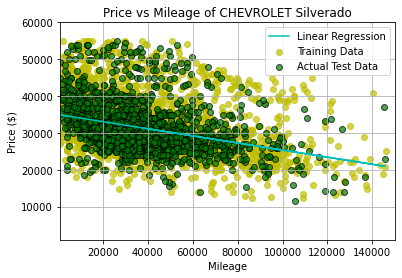

The Overall Accuracry of the Model is: 11.81%
The R^2 Value of the Linear Regression Model is: 0.12010916915134684
The Linear Equation of the Regression is: Y=-0.10X + 34,993.23
For Every Mile Driven The Value of the Truck Drops by: $-0.10
Number of Records: 5249


In [425]:
chevy_silverado_df = chevy_df.loc[(chevy_df['Model']=='Silverado')]
LinReg(chevy_silverado_df)

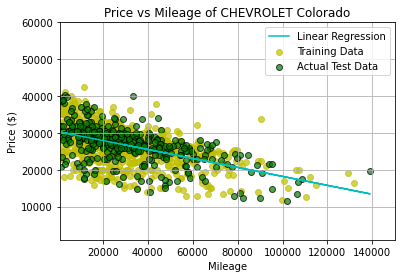

The Overall Accuracry of the Model is: 26.55%
The R^2 Value of the Linear Regression Model is: 0.3395490369496382
The Linear Equation of the Regression is: Y=-0.12X + 30,375.48
For Every Mile Driven The Value of the Truck Drops by: $-0.12
Number of Records: 1187


In [426]:
chevy_colorado_df = chevy_df.loc[(chevy_df['Model']=='Colorado')]
LinReg(chevy_colorado_df)